# Statistics: The Science of Decisions 

## Background Information

In a **Stroop task**, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the *color of the ink* in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the *congruent words* condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the *incongruent words* condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>, <span style="color:purple">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

**1. What is our independent variable? What is our dependent variable?**

Ans 1:

    The independent variable is the two conditions, a congruent words condition and an inconfruent words condition.
    The dependent variable is the time it takes to name the ink colors in equally-sized list.

**2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**
Now it’s your chance to try out the Stroop task for yourself. Go to [this link](https://faculty.washington.edu/chudler/java/ready.html), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download [this dataset](https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.


Ans 2a:

**Null Hypothesis H0**: There is no difference in population means of response time under incongruent and congruent scenarios, which can be mathematically represented as
$$ H_0: μ_C = μ_I $$
**Alternative Hypothesis H1**: The population means of the response time under incongruent and congruent scenarios are different, which can be mathematically represented as
$$ H_0: μ_C \ne μ_I $$


μ_C: the population mean under the congruent scenario

μ_I: the population mean upder the incongruent scenario


Ans 2b:

Use **paired t-test** for this statistical test because we don't have the population means. Using t-test when we have sample means and want to infer the population mean difference from the sample mean difference.

The dataset contains the performance for each participant on both congruent and incongruent words, which means the samples are dependent samples and the individual differences are controlled. Hence, we can use paired t-test to test the time differences. 

According to the three questions you asked:

1 - How many samples do we have?
    
    We only have 24 samples. T-test is useful when we have less than 30 samples.

2 - Do we know the population standard deviation?
    
    When we do not know the population standard deviation, we cannot use Z-test. 

3 - What do we know about the distribution?
    
    The distributions seem to be normally distributed, but the sample size is too small to really determine the distribution.


**3. Report some descriptive statistics regarding this dataset.** Include at least one measure of central tendency and at least one measure of variability.

Ans 3:

The central tendency can be measured by the mean of the dataset. 
       
       The mean of the congruent words: 14.05
       The mean of the incongruent words: 22.02
       The mean of the difference between congruent words and incongruent words: 7.97

The variability can be measured by the standard deviation of the dataset.
    
       The standard deviation of the congruent words: 3.56
       The standard deviation of the incongruent words: 4.80
       The standard deviation of the difference between congruent words and incongruent words: 4.86



**4. Provide one or two visualizations that show the distribution of the sample data.** Write one or two sentences noting what you observe about the plot or plots.

Ans 4:

In [15]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [23]:
congruent = np.array([12.079, 16.791, 9.564, 8.63, 14.669, 12.238, 14.692, 8.987, 9.401, 14.48, 22.328, 15.298, 
             15.073, 16.929, 18.2, 12.13, 18.495, 10.639, 11.344, 12.369, 12.944, 14.233, 19.71, 16.004])
incongruent = np.array([19.278, 18.741, 21.214, 15.687, 22.803, 20.878, 24.572, 17.394, 20.762, 26.282, 24.524, 18.644,
                17.51, 20.33, 35.255, 22.158, 25.139, 20.429, 17.425, 34.288, 23.894, 17.96, 22.058, 21.157])


In [28]:
df = pd.DataFrame({"congruent": congruent, "incongruent": incongruent})
df.head()

,congruent,incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


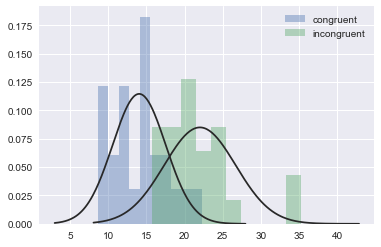

In [27]:
sns.distplot(congruent, bins=10, kde=False, fit=stats.norm, label="congruent")
sns.distplot(incongruent, bins=10, kde=False, fit=stats.norm, label="incongruent")
plt.legend();

The plot above shows the distributions for each dataset. We can see that the incongruent task tends to take a longer time than congruent task.

Correlation:  0.351819527232


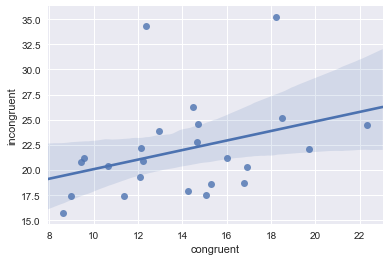

In [33]:
ax = sns.regplot(x="congruent", y="incongruent", data=df)
print("Correlation: ", np.corrcoef(congruent, incongruent)[0, 1])

The above plot show the relationship between the time of congruent task and incongruent task. From the correlation coefficient we can see that the time of two tasks has moderate correlation.

**5. Now, perform the statistical test and report your results.** What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Ans 5:

In [34]:
stats.ttest_rel(congruent, incongruent)

Ttest_relResult(statistic=-8.0207069441099588, pvalue=4.1030005857111556e-08)

My confidence level is 0.05 and the critical value is +/- 1.714.

Reject the null hypothesis.

**Conclusion**: The time of incongruent task is significant bigger than the time of congruent task. The result matched up with my expectations because we can see clearly from the overlapping histograms that the time of incongruent taks is higher than the congruent task. Using the paired to test statistically confirmed my expectations.

*Note*: the paired t-test function from scipy presents the results for **two-sided**; however, my hypothesis should be tested using **one-sided**. Hence, use the fact that the t-distribution is symmetric at zero, we can divide the p-value by 2 to get the p-value for one-sided paired t-test. The p-value ~ 2.0515e-08, which is still very small.

**6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?** Some research about the problem will be helpful for thinking about these two questions!

* *Processing speed*: this theory suggests there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors.[14] This is based on the idea that word processing is significantly faster than color processing.

* *Selective attention*: the Selective Attention Theory that color recognition as opposed to reading a word, requires more attention, the brain needs to use more attention to recognize a color than to word encoding, so it takes a little longer.

* *Automaticity*: it suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading. 

* *Parallel distributed processing*: this theory suggests that as the brain analyzes information, different and specific pathways are developed for different tasks. Some pathways, such as reading, are stronger than others, therefore, it is the strength of the pathway and not the speed of the pathway that is important.

    Show pictures with different wrong titles. For example, show a dog picture with a title of "Cat".